## 3D 曲线拟合练习

### 本节小目标

使用如下函数求解非线性最小二乘拟合问题，通过自定义残差函数实现空间曲线的拟合。

- optimize.leastsq(residual, p0, args=(zdata, xdata, ydata))

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [15]:
%matplotlib notebook

In [16]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 5.8)

### 生成模拟数据

<IPython.core.display.Javascript object>


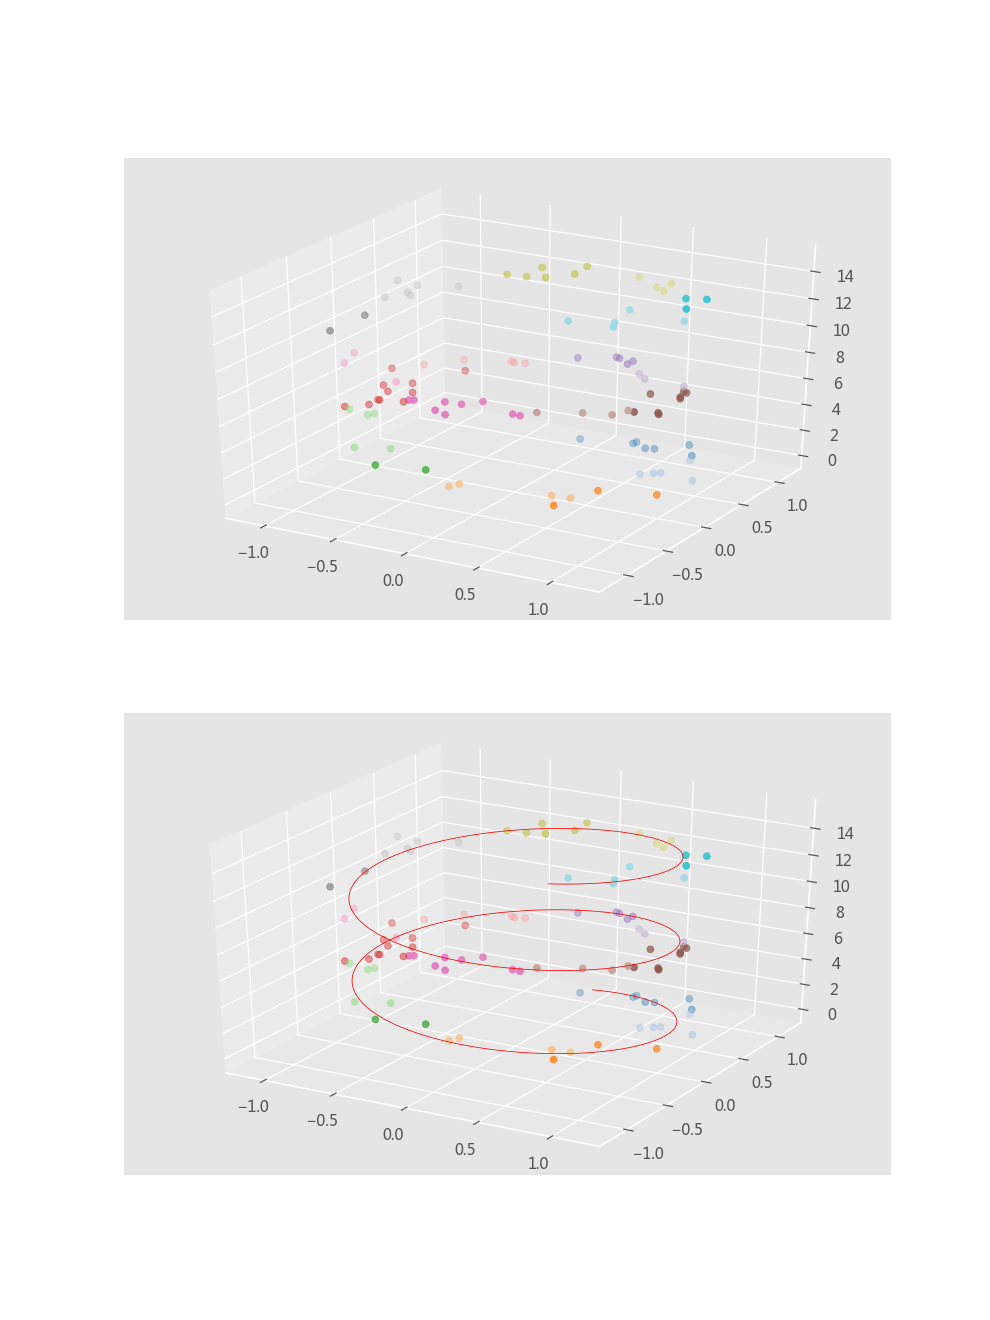

In [17]:
# 1、创建 figure
fig = plt.figure(figsize=(9,12))

# 2、创建图轴 1 并绘制数据
ax1 = fig.add_subplot(211, projection='3d')

# 3D 散点
np.random.seed(10)
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='tab20');

    
# 3、创建图轴 2 并绘制数据
ax2 = fig.add_subplot(212, projection='3d')

# 3D 曲线
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax2.plot3D(xline, yline, zline, 'red', linewidth=0.5)

# 3D 散点
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='tab20');

### 拟合 3D 曲线

- 首先，回顾一下你和 2D 平面曲线的例子。


- 思考如何推广到拟合 3D 空间曲线。

In [18]:
from scipy import optimize

In [19]:
# 定义参数待求解的函数
def f(x, a, b):
    return a*np.sin(b*np.pi*x)

p = [5, 5]
x = np.linspace(0, 1, 30)
np.random.seed(10)
y = f(x, *p) + .5*np.random.normal(size=len(x))
xn = np.linspace(0, 1, 200)

In [20]:
# 定义优化求解器的残差函数
def residual(p, x, y):
    return y - f(x, *p)

<IPython.core.display.Javascript object>


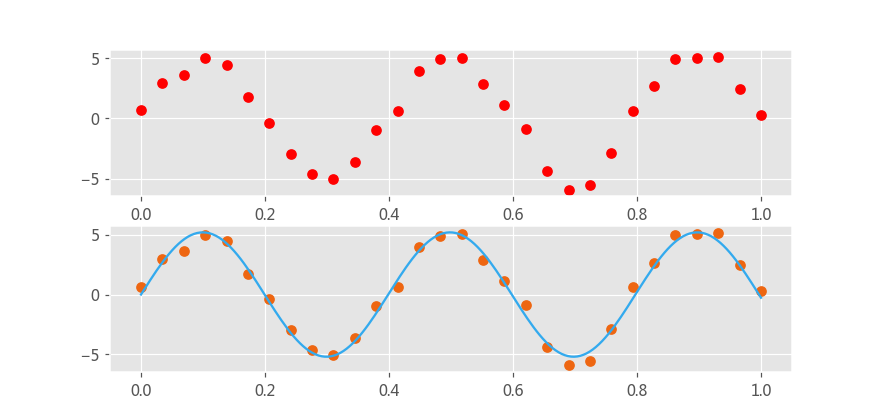

[5.20012398 5.01625385]


In [21]:
fig0 = plt.figure(figsize=(8, 3.8))

ax01 = fig0.add_subplot(211)
ax01.plot(x, y, 'or')

p0 = [3, 4]
popt, pcov = optimize.leastsq(residual, p0, args=(x, y))
print(popt)

ax02 = fig0.add_subplot(212)
ax02.plot(x, y, 'o', color='#ee6611');
ax02.plot(xn, f(xn, *popt), '-', color='#33aaee');

### 拟合 3D 空间曲线

- 定义曲线函数，确定待求参数


- 定义残差函数，调用非线性最小二乘拟合

In [9]:
def f(？):
    #此处如何定义？

In [10]:
p0 = [？]

# 定义残差函数，系数待求
def residual(？):
    # 此处如何定义？

popt = optimize.leastsq(residual, p0, args=(zdata, xdata, ydata))
popt

(array([0.98635946, 0.99706807, 0.01778435, 0.99703072, 0.99838194,
        1.58101761]), 1)

In [11]:
a1,b1,c1, a2,b2,c2 = popt[0][0:6]

In [12]:
font = {'family' : 'serif',
        'color'  : 'darkblue',
        'weight' : 'normal',
        'size'   : 12,}

<IPython.core.display.Javascript object>


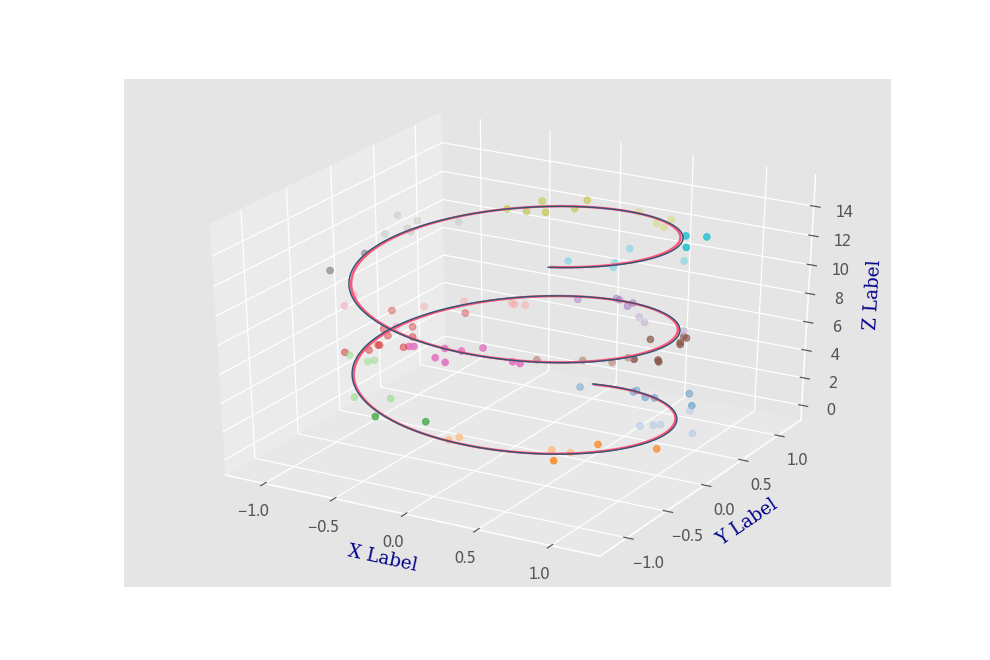

Text(0.5, 0, 'Z Label')

In [13]:
# 绘制数据生成曲线以及拟合后的曲线
？

## colormap

https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html